### DataSets: https://www.kaggle.com/c/zillow-prize-1/data

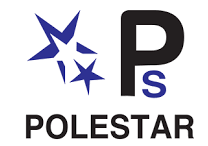

In [119]:
from IPython.display import Image; Image(filename='polestar.png')

### Importing Libraries 

In [120]:
import warnings 
warnings.filterwarnings('ignore')

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection, preprocessing, ensemble
import xgboost as xgb

In [122]:
pd.options.display.max_columns = 999

### Load Dataset

In [123]:
prop = pd.read_csv("properties_2016.csv")
train16 = pd.read_csv("train_2016_v2.csv",parse_dates=['transactiondate'])

In [124]:
prop.shape,train16.shape

((2985217, 58), (90275, 3))

### Data Info

In [125]:
prop.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [126]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [127]:
train16.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [128]:
train16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
parcelid           90275 non-null int64
logerror           90275 non-null float64
transactiondate    90275 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


In [129]:
train16.transactiondate.describe()

count                   90275
unique                    352
top       2016-07-29 00:00:00
freq                      910
first     2016-01-01 00:00:00
last      2016-12-30 00:00:00
Name: transactiondate, dtype: object

In [130]:
train16['Month'] = train16['transactiondate'].dt.month

### EDA

##### Univariate Analysis

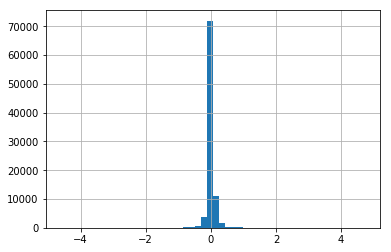

In [131]:
train16.logerror.hist(bins=50)

In [132]:
train16_clip=np.clip(train16.logerror, np.percentile(train16.logerror,99), np.percentile(train16.logerror,1))

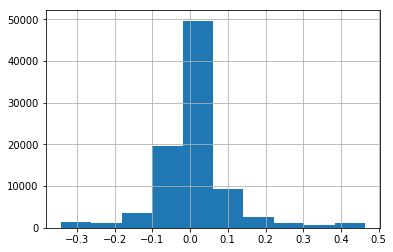

In [133]:
train16_clip.hist()

### Monthly Trend 

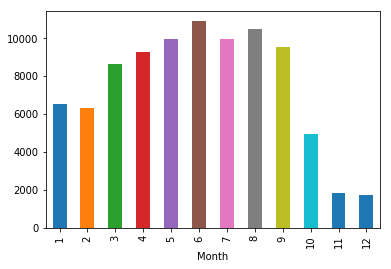

In [134]:
train16.groupby('Month').parcelid.count().plot(kind='Bar')

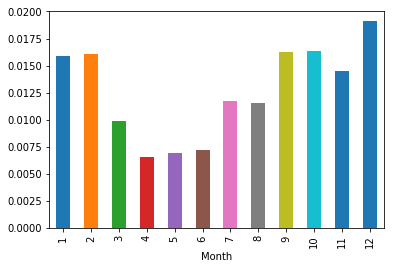

In [135]:
train16.groupby('Month').logerror.mean().plot(kind='Bar')

In [136]:
train16=train16.drop('Month',axis=1)

In [137]:
train16.parcelid.value_counts().value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [138]:
prop.get_dtype_counts()

float64    52
int64       1
object      5
dtype: int64

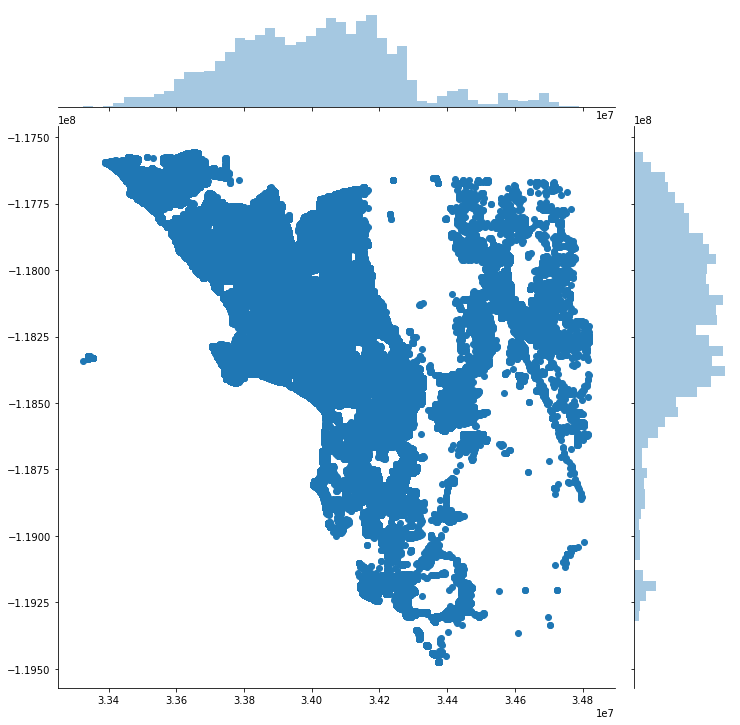

In [139]:
sns.jointplot(x=prop.latitude.values, y=prop.longitude.values, height=10)

In [184]:
df = pd.merge(train16, prop, on='parcelid', how='left')
df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


##### Important Variables 

In [141]:
m_values = df.mean(axis=0)
train_df_new = df.fillna(m_values)

In [142]:
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

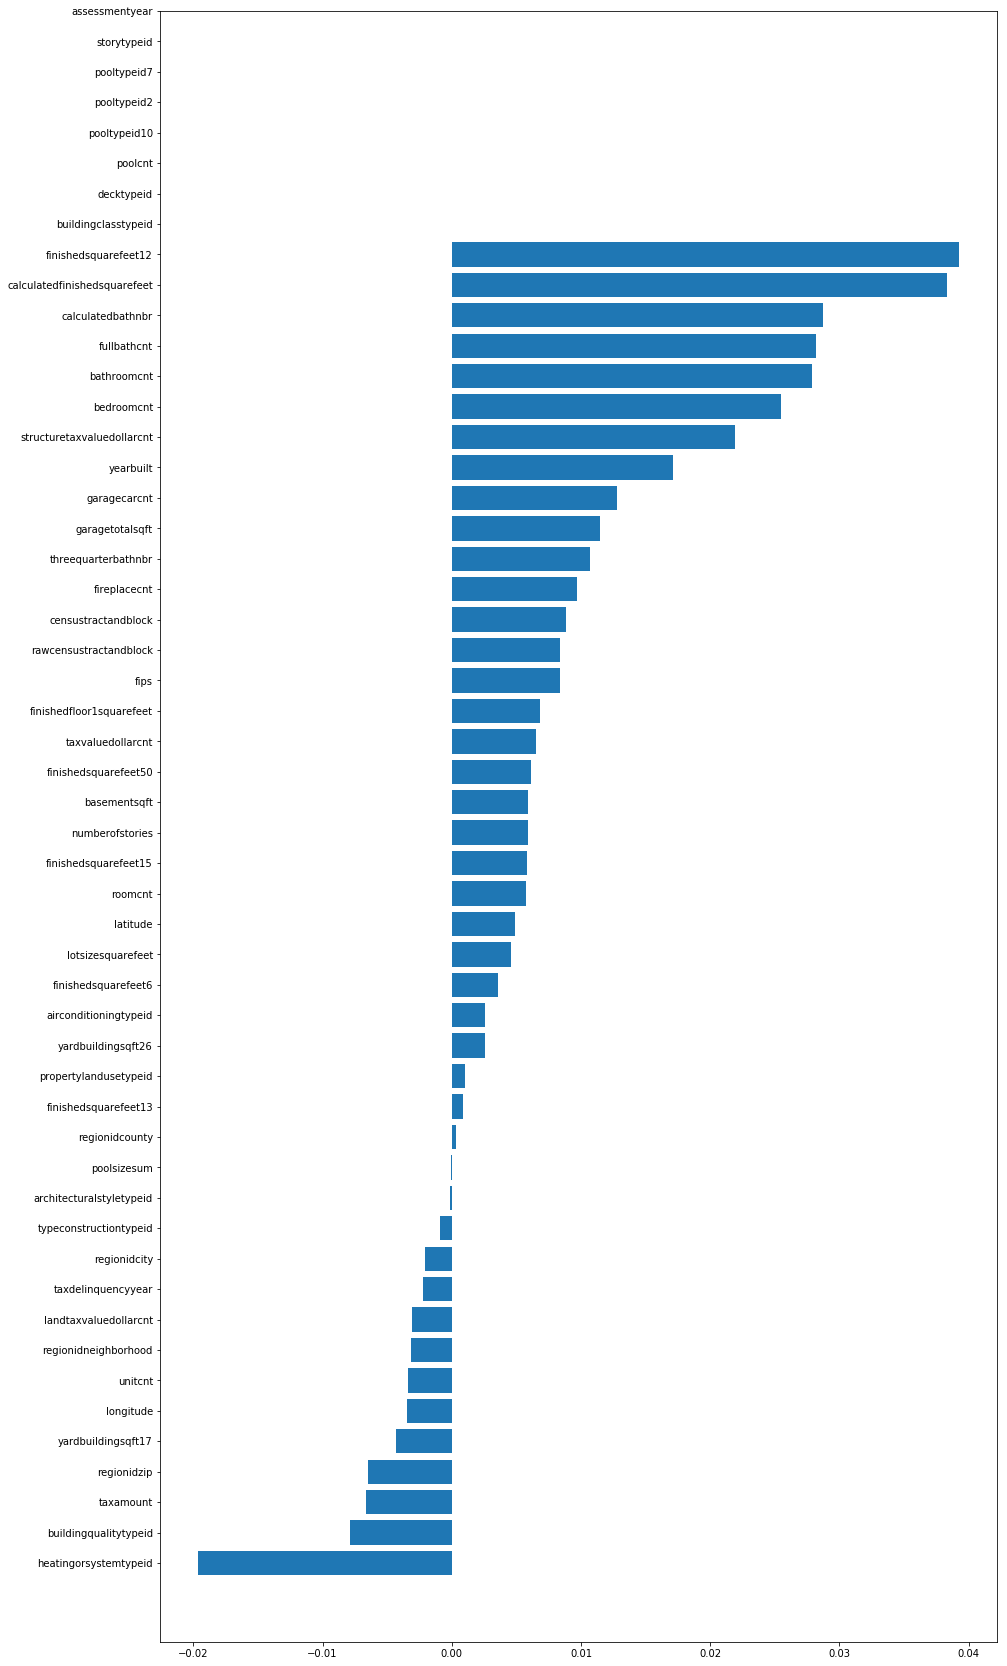

In [143]:
tick = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(15,30))
rects = ax.barh(tick, np.array(corr_df.corr_values.values))
ax.set_yticks(tick)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
plt.show()

In [144]:
imp=corr_df[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
imp_var=imp['col_labels'].tolist()

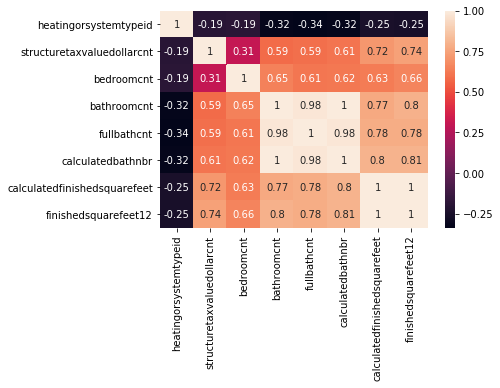

In [145]:
sns.heatmap(df[imp_var].corr(),annot=True)

In [146]:
df_new=train_df_new.copy()

In [147]:
ulimit = np.percentile(df_new.logerror.values, 99)
llimit = np.percentile(df_new.logerror.values, 1)
df_new['logerror'].ix[df_new['logerror']>ulimit] = ulimit
df_new['logerror'].ix[df_new['logerror']<llimit] = llimit

### Bedroom Count

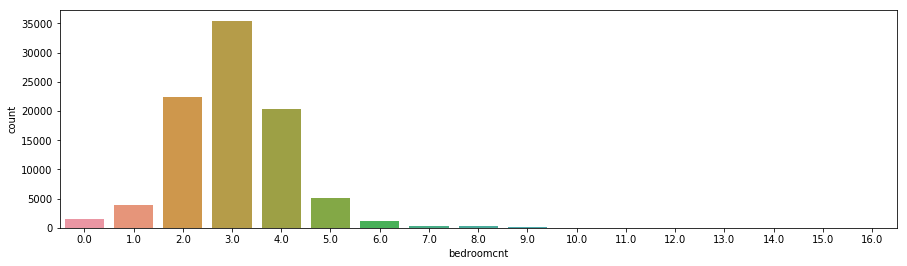

In [148]:
plt.figure(figsize=(15,4))
sns.countplot(x="bedroomcnt", data=df_new)

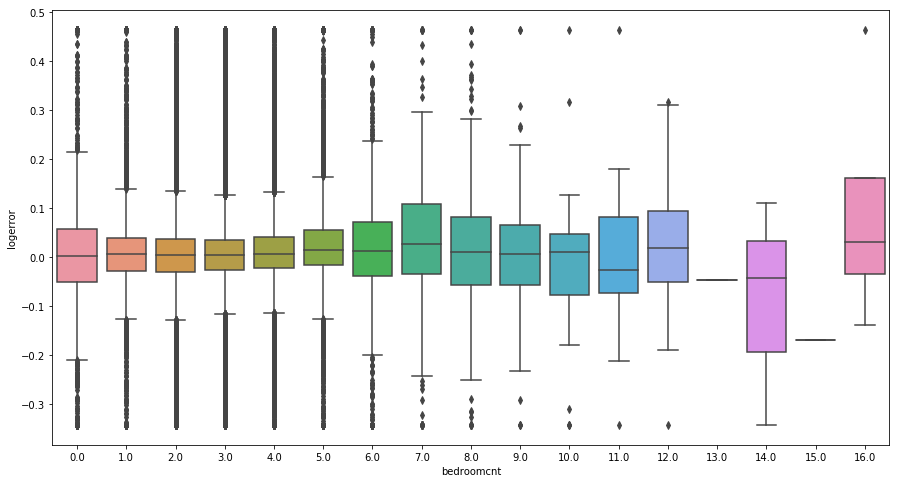

In [149]:
plt.figure(figsize=(15,8)) 
sns.boxplot(x="bedroomcnt", y="logerror", data=df_new)

### Bathroom Count

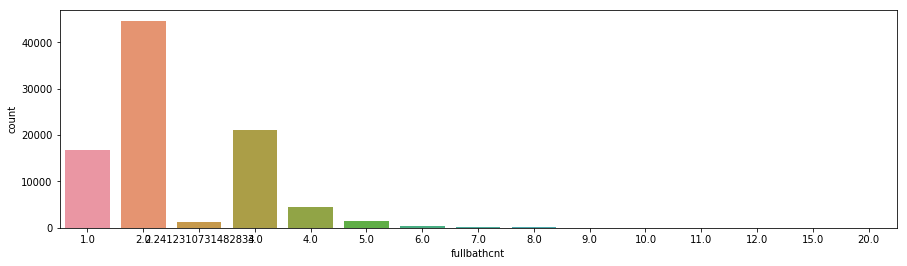

In [150]:
plt.figure(figsize=(15,4))
sns.countplot(x="fullbathcnt", data=df_new)

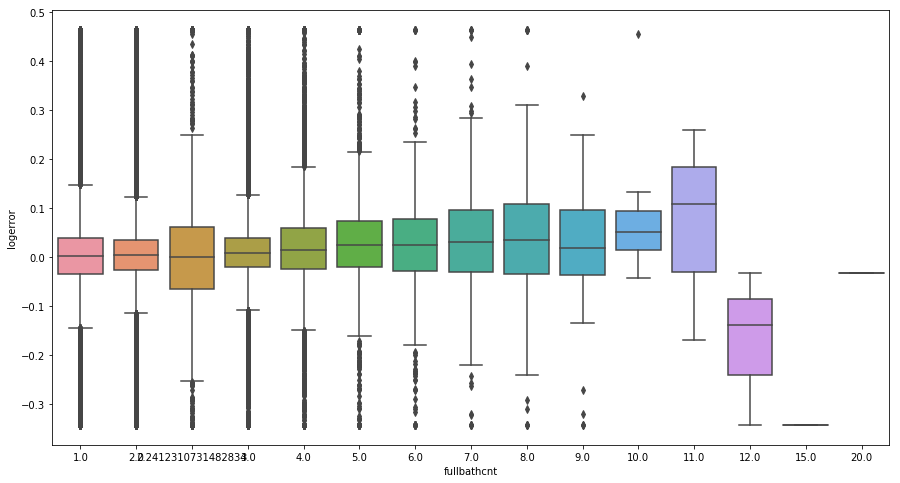

In [151]:
plt.figure(figsize=(15,8))
sns.boxplot(x="fullbathcnt", y="logerror", data=df_new)

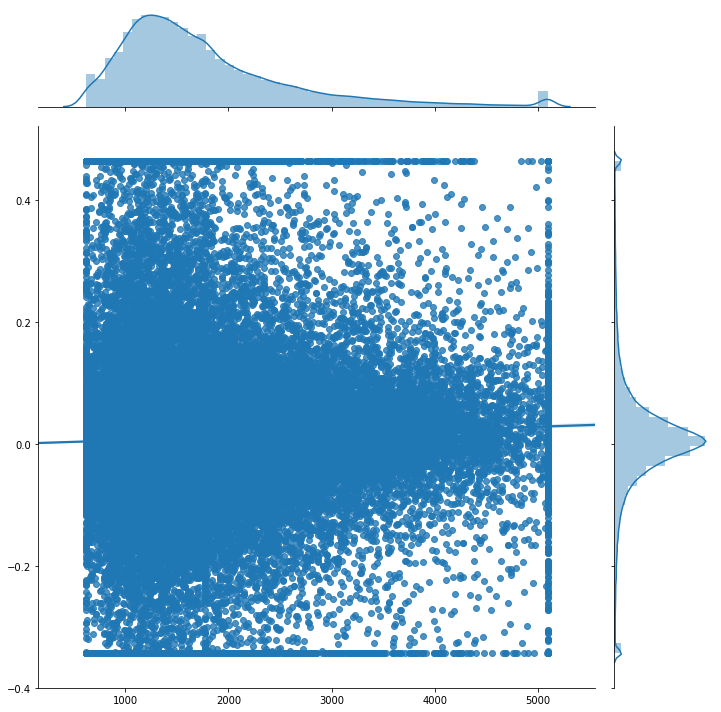

In [152]:
col = "calculatedfinishedsquarefeet"
ulimit = np.percentile(df_new[col].values, 99)
llimit = np.percentile(df_new[col].values, 1)
df_new[col].ix[df_new[col]>ulimit] = ulimit
df_new[col].ix[df_new[col]<llimit] = llimit

sns.jointplot(x=df_new.calculatedfinishedsquarefeet.values, y=df_new.logerror.values, height=10, kind = 'reg')

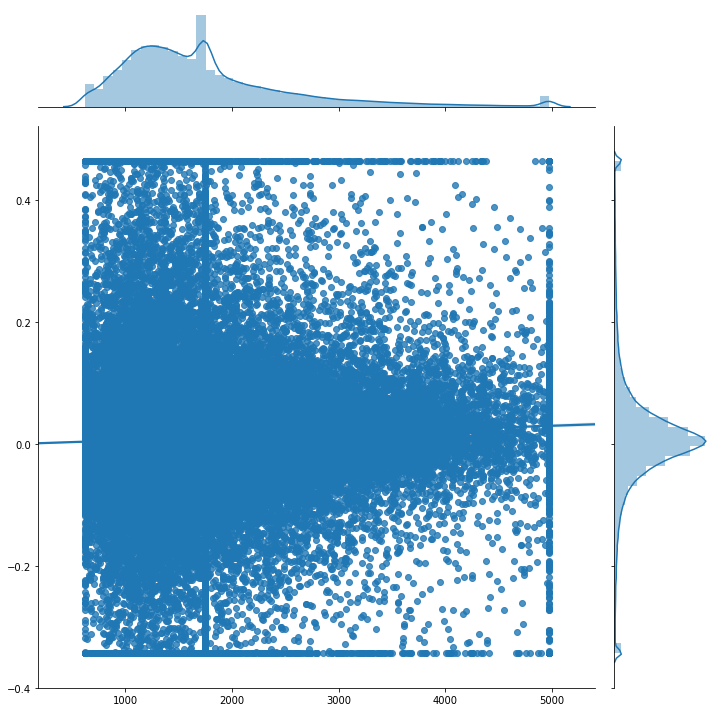

In [153]:
col = "finishedsquarefeet12"
ulimit = np.percentile(df_new[col].values, 99)
llimit = np.percentile(df_new[col].values, 1)
df_new[col].loc[df_new[col]>ulimit] = ulimit
df_new[col].loc[df_new[col]<llimit] = llimit

sns.jointplot(x=df_new.finishedsquarefeet12.values, y=df_new.logerror.values, height=10, kind = 'reg')

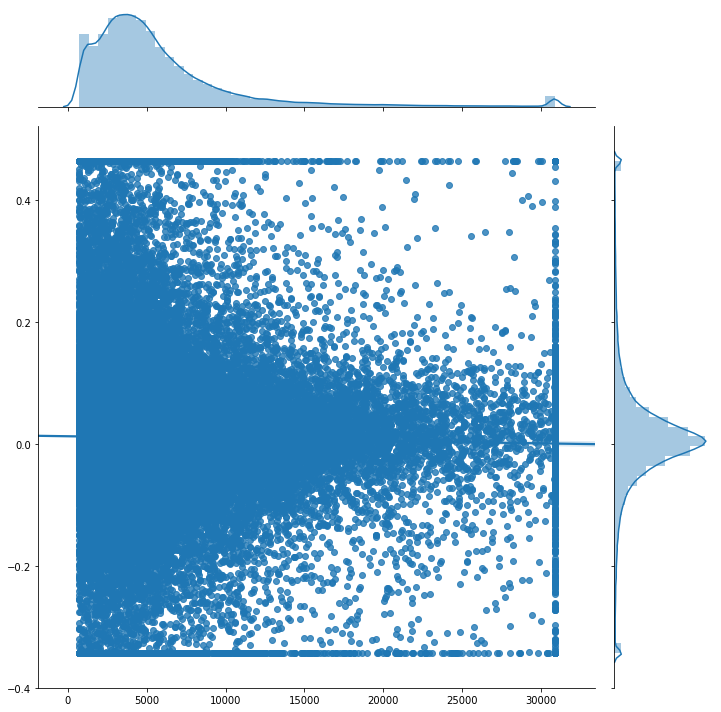

In [154]:
col = "taxamount"
ulimit = np.percentile(df_new[col].values, 99)
llimit = np.percentile(df_new[col].values, 1)
df_new[col].loc[df_new[col]>ulimit] = ulimit
df_new[col].loc[df_new[col]<llimit] = llimit

sns.jointplot(x=df_new['taxamount'].values, y=df_new['logerror'].values, height=10, kind = 'reg')

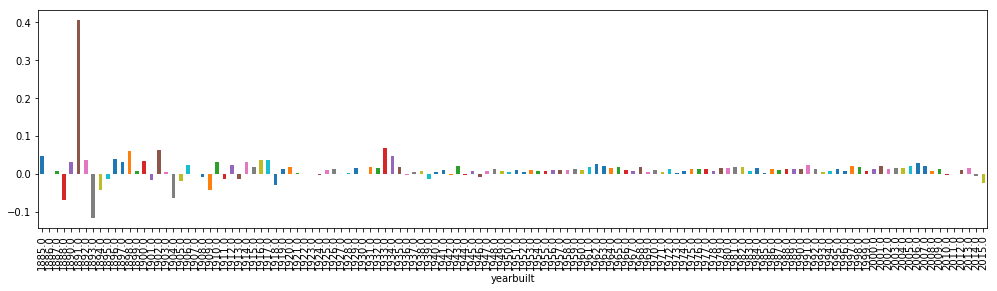

In [155]:
plt.figure(figsize=(17,4)) 
df.groupby('yearbuilt').logerror.mean().plot(kind='Bar')

In [156]:
missing_df_prop = (df.isnull().sum()/df.shape[0])
missing_df_prop_l = missing_df_prop.values.tolist()
missing_weighted=df.isnull()*missing_df_prop_l
df_new['missing_col']=missing_weighted.sum(axis = 1)

In [157]:
missing_df_prop_l = missing_df_prop.values.tolist()

### Data Cleansing 

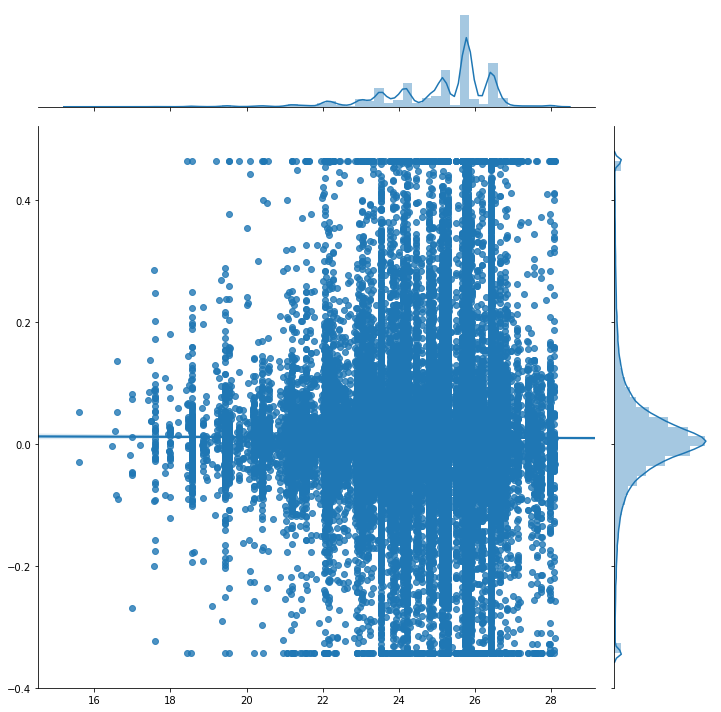

In [158]:
sns.jointplot(x=df_new['missing_col'].values, y=df_new['logerror'].values, height=10, kind = 'reg')

In [159]:
missing_df = df.isnull().sum(axis=0).reset_index()

In [160]:
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df.shape[0]
missing_list = missing_df['column_name'][missing_df['missing_ratio']>0.9].tolist()

In [161]:
missing_list

['architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'hashottuborspa',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'storytypeid',
 'typeconstructiontypeid',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'fireplaceflag',
 'taxdelinquencyflag',
 'taxdelinquencyyear']

### Geo Location Error

In [162]:
geo_df = df[['latitude', 'longitude','logerror']]

In [163]:
'''
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=120).fit(geo_df[['latitude','longitude']])
geo_df['label'] = kmeans.labels_
plt.figure(figsize=(17,4)) 
geo_df.groupby('label').logerror.mean().plot(kind='Bar')
'''

"\nfrom sklearn.cluster import KMeans\nkmeans = KMeans(n_clusters=120).fit(geo_df[['latitude','longitude']])\ngeo_df['label'] = kmeans.labels_\nplt.figure(figsize=(17,4)) \ngeo_df.groupby('label').logerror.mean().plot(kind='Bar')\n"

In [164]:
'''
map_2 = folium.Map(location=[34.088537, -118.249923],
                   zoom_start=9)
for label in kmeans.cluster_centers_:
    folium.Marker(location=[label][0]).add_to(map_2)

map_2
'''

'\nmap_2 = folium.Map(location=[34.088537, -118.249923],\n                   zoom_start=9)\nfor label in kmeans.cluster_centers_:\n    folium.Marker(location=[label][0]).add_to(map_2)\n\nmap_2\n'

In [176]:
def clean_data(data):
    data=data.drop(missing_list, axis=1)
    data=data.drop(['fullbathcnt','bathroomcnt','propertyzoningdesc','heatingorsystemtypeid'], axis=1)
    
    data.airconditioningtypeid.fillna(-999,inplace=True)
    data['airconditioningtypeid'] = data['airconditioningtypeid'].astype('category')
     
    data['pid_Counts'] = data.groupby(['parcelid'])['parcelid'].transform('count')
    data=data.drop('parcelid', axis=1)
    data = pd.get_dummies(data)
    
    data['Counts'] = data.isnull().sum(axis = 1)   
    missing_df_prop = data.shape[0]/(data.isnull().sum()+1)
    missing_df_prop_l = missing_df_prop.values.tolist()
    missing_weighted = data.isnull()*missing_df_prop_l
    data['Wcount'] = missing_weighted.sum(axis = 1)
    data.drop('Counts',axis=1)

    return data

In [185]:
df = df[df.logerror > -0.4 ]
df = df[df.logerror < 0.419 ]
df = df.reset_index(drop=True)
df=df.drop(['transactiondate'],axis=1)
train=clean_data(df.drop(['logerror'],axis=1))
train_y=df.logerror

In [186]:
import gc
gc.collect()

192

### XGB Model

In [187]:
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=321, num_rounds=3000):
    param = {'objective' : 'reg:linear',
            'eta' : 0.1,
            'silent' : 1,
            'eval_metric' : "rmse",
            'min_child_weight' : 1,
            'nthread' : 16,
            'subsample' : 0.8,
            'colsample_bytree' : 0.7,
            'seed' : seed_val,
            'num_rounds' : num_rounds}

    para = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(para, xgtrain, num_rounds, watchlist, early_stopping_rounds=20, verbose_eval = 10)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(para, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest)
    return pred_test_y, model

### Train Test Split

In [188]:
cv_scores = []
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)
for train_index, test_index in kf.split(range(train.shape[0])):
    train_x, test_x = train.loc[train_index,:], train.loc[test_index,:]
    train_y, test_y = train_y[train_index], train_y[test_index]
    preds, model = runXGB(train_x, train_y, test_x, test_y)
    cv_scores.append(mean_absolute_error(test_y, preds))
    break

[0]	train-rmse:0.45097	test-rmse:0.450142
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 20 rounds.
[10]	train-rmse:0.175078	test-rmse:0.174699
[20]	train-rmse:0.097756	test-rmse:0.098495
[30]	train-rmse:0.083217	test-rmse:0.084869
[40]	train-rmse:0.080935	test-rmse:0.083042
[50]	train-rmse:0.080367	test-rmse:0.082845
[60]	train-rmse:0.080067	test-rmse:0.082829
[70]	train-rmse:0.079811	test-rmse:0.082786
[80]	train-rmse:0.079463	test-rmse:0.082807
[90]	train-rmse:0.079169	test-rmse:0.082824
Stopping. Best iteration:
[72]	train-rmse:0.079731	test-rmse:0.082775



### Feature Importance 

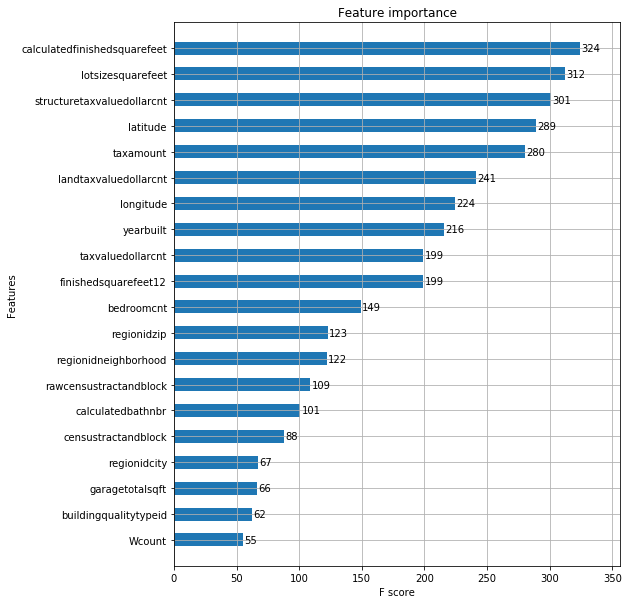

In [189]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
xgb.plot_importance(model, max_num_features=20, height=0.5, ax=ax)